In [5]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib

data_dir = pathlib.Path("/Users/rachitjaiswal/Desktop/Python/Horizon/Project/Warp-C/train_crops/bottle/bottle-blue/").with_suffix('')

image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)
blue_bottle = list(data_dir.glob('*'))
PIL.Image.open(str(blue_bottle[600]))


ModuleNotFoundError: No module named 'PIL'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import keras

In [ ]:
array = np.array(blue_bottle)

In [ ]:
batch_size = 634
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/Users/rachitjaiswal/Desktop/Python/Horizon/Project/Warp-C/train_crops/bottle/",
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "/Users/rachitjaiswal/Desktop/Python/Horizon/Project/Warp-C/train_crops/bottle/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6519 files belonging to 20 classes.
Using 5868 files for training.
Found 6519 files belonging to 20 classes.
Using 1303 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bottle-blue', 'bottle-blue-full', 'bottle-blue5l', 'bottle-blue5l-full', 'bottle-dark', 'bottle-dark-full', 'bottle-green', 'bottle-green-full', 'bottle-milk', 'bottle-milk-full', 'bottle-multicolor', 'bottle-multicolorv-full', 'bottle-oil', 'bottle-oil-full', 'bottle-transp', 'bottle-transp-full', 'bottle-yogurt', 'glass-dark', 'glass-green', 'glass-transp']


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 20

# try adding fewer layers, regularization video for overfitting
# one fewer layer/two fewer layers

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=24
)

Epoch 1/24
10/10 [==============================] - 53s 5s/step - loss: 2.7501 - accuracy: 0.1708 - val_loss: 2.6217 - val_accuracy: 0.2226
Epoch 2/24
10/10 [==============================] - 50s 5s/step - loss: 2.5210 - accuracy: 0.2490 - val_loss: 2.3937 - val_accuracy: 0.2932
Epoch 3/24
10/10 [==============================] - 55s 5s/step - loss: 2.2870 - accuracy: 0.3195 - val_loss: 2.1656 - val_accuracy: 0.3576
Epoch 4/24
10/10 [==============================] - 54s 5s/step - loss: 2.0869 - accuracy: 0.3609 - val_loss: 1.9723 - val_accuracy: 0.3975
Epoch 5/24
10/10 [==============================] - 45s 4s/step - loss: 1.9335 - accuracy: 0.3978 - val_loss: 1.8835 - val_accuracy: 0.4160
Epoch 6/24
10/10 [==============================] - 53s 5s/step - loss: 1.8190 - accuracy: 0.4208 - val_loss: 1.7678 - val_accuracy: 0.4421
Epoch 7/24
10/10 [==============================] - 53s 5s/step - loss: 1.7121 - accuracy: 0.4448 - val_loss: 1.6974 - val_accuracy: 0.4605
Epoch 8/24
10/10 [==

In [ ]:
model.metrics_names
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,2.750091,0.170757,2.621690,0.222563
1,2.521049,0.248978,2.393680,0.293170
2,2.287046,0.319530,2.165617,0.357636
3,2.086893,0.360941,1.972345,0.397544
4,1.933495,0.397750,1.883525,0.415963
5,1.819041,0.420757,1.767761,0.442057
6,1.712092,0.444785,1.697430,0.460476
7,1.621031,0.468303,1.650206,0.466615
8,1.545869,0.487900,1.572666,0.478895
9,1.470591,0.509373,1.507079,0.503454


<AxesSubplot: >

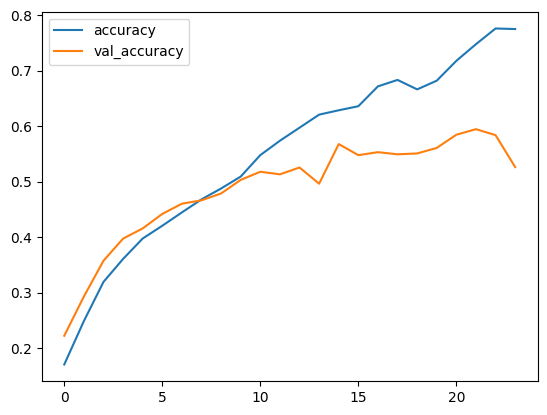

In [ ]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot: >

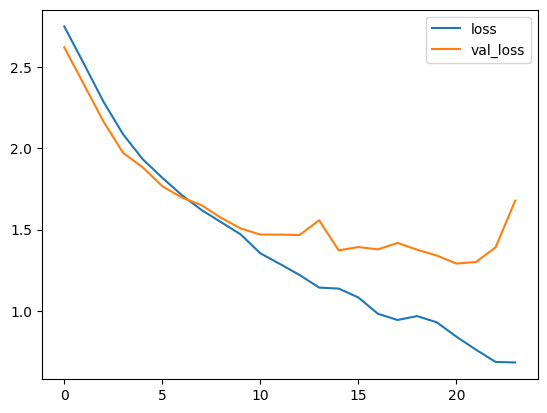

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
